# Learning in standard Q-learning model

Alana Jaskir <br>
Brown University, Providence, RI, USA <br>
Laboratory for Neural Computation and Cognition <br>
Michael Frank <br>

This code generates figures which suggest online modulation of dopamine at choice in the OpAL model by state value improve performance compared to a model with fixed, moderate levels of DA

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import importlib
from sklearn import metrics

import os
import sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))
# my models
import rl
from rl import RL
import learn
import plot_dynamics
import opt_rl

In [2]:
importlib.reload(learn)
importlib.reload(rl)
importlib.reload(plot_dynamics)

<module 'plot_dynamics' from '/Users/ajaskir/Desktop/Desktop - CLPS-Jaskir18/Projects/FYP/code/opal/standard_rl/../plot_dynamics.py'>

In [21]:
# initialize parameters
alpha = 0.05            # from opal paper   0.24
beta = 18.10702497        # 27.4
params = (alpha, beta)

n_states = 100
n_trials = 100
v0 = 0.5
rmag = 1
lmag = 0

plt.rcParams.update({'font.size': 22})

iter: 0


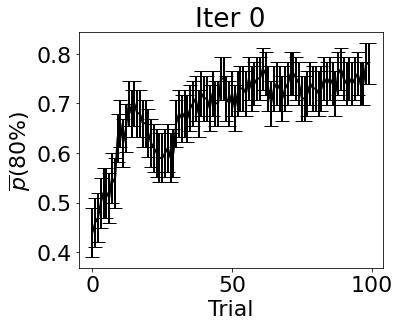

In [22]:
env = "rich"
n_times = 1
save = []
my_seeds = np.random.randint(1,100000,size=n_times)

for i in range(n_times):
    print("iter: %s" %i)
    states = learn.simulate(params,n_states,n_trials,v0=v0,env=env,r_mag=rmag,l_mag=lmag, UCB=True, UCB_samplemean=True,gamma=0.59)
    save.append(states)
    
    # plot average sm'
    fig, axs = plt.subplots(figsize=(6, 5))
    plot_dynamics.avg_choice(states,n_trials,n_states,0,axs,"black")
    plt.title("Iter %s" %i)
    plt.xlabel("Trial")
    plt.ylabel("$\overline{p}(80\%)$")
    plt.tight_layout()

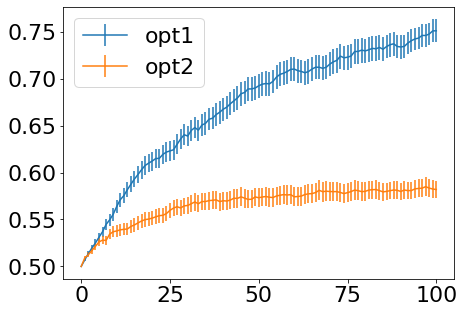

In [23]:
# plot dynamics for val mod
fig, ax = plt.subplots(figsize=(7, 5)) # q values
plot_dynamics.avg_q(states,n_trials,n_states,0,ax)
plot_dynamics.avg_q(states,n_trials,n_states,1,ax)
plt.legend(["opt1","opt2"])

iter: 0


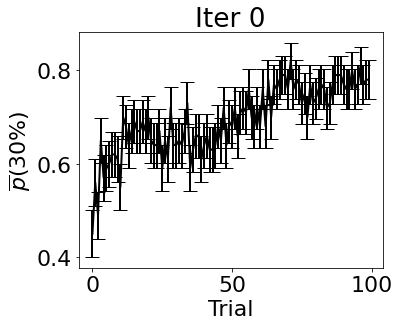

In [26]:
env = "lean"
n_times = 1
save = []
my_seeds = np.random.randint(1,100000,size=n_times)

for i in range(n_times):
    print("iter: %s" %i)
    states = learn.simulate(params,n_states,n_trials,v0=v0,env=env,r_mag=rmag,l_mag=lmag, UCB=True, UCB_samplemean=True,gamma=.59)
    save.append(states)
    
    # plot average sm'
    fig, axs = plt.subplots(figsize=(6, 5))
    plot_dynamics.avg_choice(states,n_trials,n_states,0,axs,"black")
    plt.title("Iter %s" %i)
    plt.xlabel("Trial")
    plt.ylabel("$\overline{p}(30\%)$")
    plt.tight_layout()

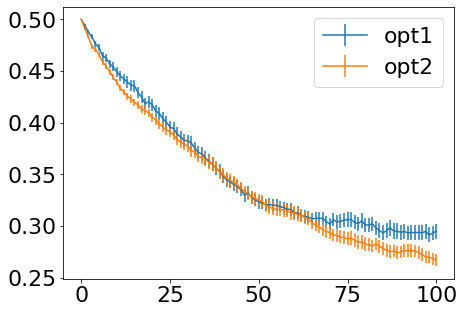

In [27]:
# plot dynamics for val mod
fig, ax = plt.subplots(figsize=(7, 5)) # q values
plot_dynamics.avg_q(states,n_trials,n_states,0,ax)
plot_dynamics.avg_q(states,n_trials,n_states,1,ax)
plt.legend(["opt1","opt2"])

# OPTIMIZE

In [2]:
res = opt_rl.main(100,2,1,1)

In [3]:
res

     fun: -0.72393
 message: 'Optimization terminated successfully.'
    nfev: 368
     nit: 10
 success: True
       x: array([0.5933266])

In [3]:
res = opt_rl.main()
print(res)

     fun: -0.6663006834255667
 message: 'Optimization terminated successfully.'
    nfev: 363
     nit: 4
 success: True
       x: array([ 0.20580718, 24.32904257])
